# Exploratory Data Analysis (EDA) of Cleaned BRFSS Data
This notebook performs EDA on the cleaned BRFSS dataset to:
1. Analyze relationships between variables
2. Generate data visualizations
3. Select a subset of variables for modeling, based on the problem statement and data background

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/processed/001-finalCleanBRFSSData.csv")
df.head()

,_STATE,IDATE,IMONTH,DISPCODE,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_TOTINDA,_RFSEAT3,YEAR
0,1.0,2015-01-29,1.0,1200,5,15,18,1,1,2,...,2,2,3,1.0,2,5.397605e-79,1.0,2,1,2015
1,1.0,2015-01-20,1.0,1100,3,0,0,2,1,1,...,4,1,1,2.0,2,5.397605e-79,1.0,1,2,2015
2,1.0,2015-02-01,2.0,1200,4,15,0,1,2,2,...,2,9,9,9.0,9,9.000000e+02,9.0,9,9,2015
3,1.0,2015-01-14,1.0,1100,5,30,30,1,2,1,...,2,5,4,1.0,2,5.397605e-79,1.0,2,1,2015
4,1.0,2015-01-14,1.0,1100,5,20,0,1,1,2,...,3,9,4,1.0,2,5.397605e-79,1.0,2,1,2015


## 1. Data Overview and Summary Statistics (Data Profiles - Plots and Summaries)
- Check shape, data types, and missing values
- Display summary statistics for numerical and categorical variables

In [3]:
# Data shape and info
print(f"Data shape: {df.shape}")
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

Data shape: (2225584, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225584 entries, 0 to 2225583
Data columns (total 56 columns):
 #   Column    Dtype  
---  ------    -----  
 0   _STATE    float64
 1   IDATE     object 
 2   IMONTH    float64
 3   DISPCODE  int64  
 4   GENHLTH   int64  
 5   PHYSHLTH  int64  
 6   MENTHLTH  int64  
 7   HLTHPLN1  int64  
 8   PERSDOC2  int64  
 9   MEDCOST   int64  
 10  CHECKUP1  int64  
 11  CVDINFR4  int64  
 12  CVDCRHD4  int64  
 13  CVDSTRK3  int64  
 14  ASTHMA3   int64  
 15  CHCSCNCR  int64  
 16  CHCOCNCR  int64  
 17  CHCCOPD1  int64  
 18  HAVARTH3  int64  
 19  ADDEPEV2  int64  
 20  CHCKIDNY  float64
 21  DIABETE3  int64  
 22  SEX       int64  
 23  MARITAL   int64  
 24  RENTHOM1  int64  
 25  VETERAN3  int64  
 26  CHILDREN  int64  
 27  INCOME2   float64
 28  WEIGHT2   float64
 29  HEIGHT3   float64
 30  QLACTLM2  int64  
 31  USEEQUIP  int64  
 32  EXERANY2  int64  
 33  PNEUVAC3  int64  
 34  HIVTST6   int64  
 35  QSTVE

_STATE      0
IDATE       0
QLACTLM2    0
USEEQUIP    0
EXERANY2    0
PNEUVAC3    0
HIVTST6     0
QSTVER      0
_RFHLTH     0
_HCVU651    0
dtype: int64

In [4]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_STATE,2225584.0,29.792151,15.734275,1.000000e+00,1.900000e+01,29.0000,42.000,72.00
IMONTH,2225584.0,6.492911,3.413457,1.000000e+00,3.000000e+00,6.0000,9.000,12.00
DISPCODE,2225584.0,1109.647625,29.524333,1.100000e+03,1.100000e+03,1100.0000,1100.000,1200.00
GENHLTH,2225584.0,2.558056,1.121170,1.000000e+00,2.000000e+00,2.0000,3.000,9.00
PHYSHLTH,2225584.0,4.277453,8.787999,0.000000e+00,0.000000e+00,0.0000,3.000,30.00
MENTHLTH,2225584.0,3.379065,7.687706,0.000000e+00,0.000000e+00,0.0000,2.000,30.00
HLTHPLN1,2225584.0,1.117513,0.475747,1.000000e+00,1.000000e+00,1.0000,1.000,9.00
PERSDOC2,2225584.0,1.394876,0.804665,1.000000e+00,1.000000e+00,1.0000,1.000,9.00
MEDCOST,2225584.0,1.896662,0.401017,1.000000e+00,2.000000e+00,2.0000,2.000,9.00
CHECKUP1,2225584.0,1.586430,1.226266,1.000000e+00,1.000000e+00,1.0000,2.000,9.00


In [36]:
# Summary statistics for categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(dropna=False).head(10))


IDATE value counts:
IDATE
2012-04-03    2577
2011-08-02    2559
2011-03-02    2526
2012-02-07    2526
2012-08-01    2497
2012-04-04    2495
2011-08-03    2481
2012-08-02    2477
2011-11-03    2419
2013-07-09    2386
Name: count, dtype: int64


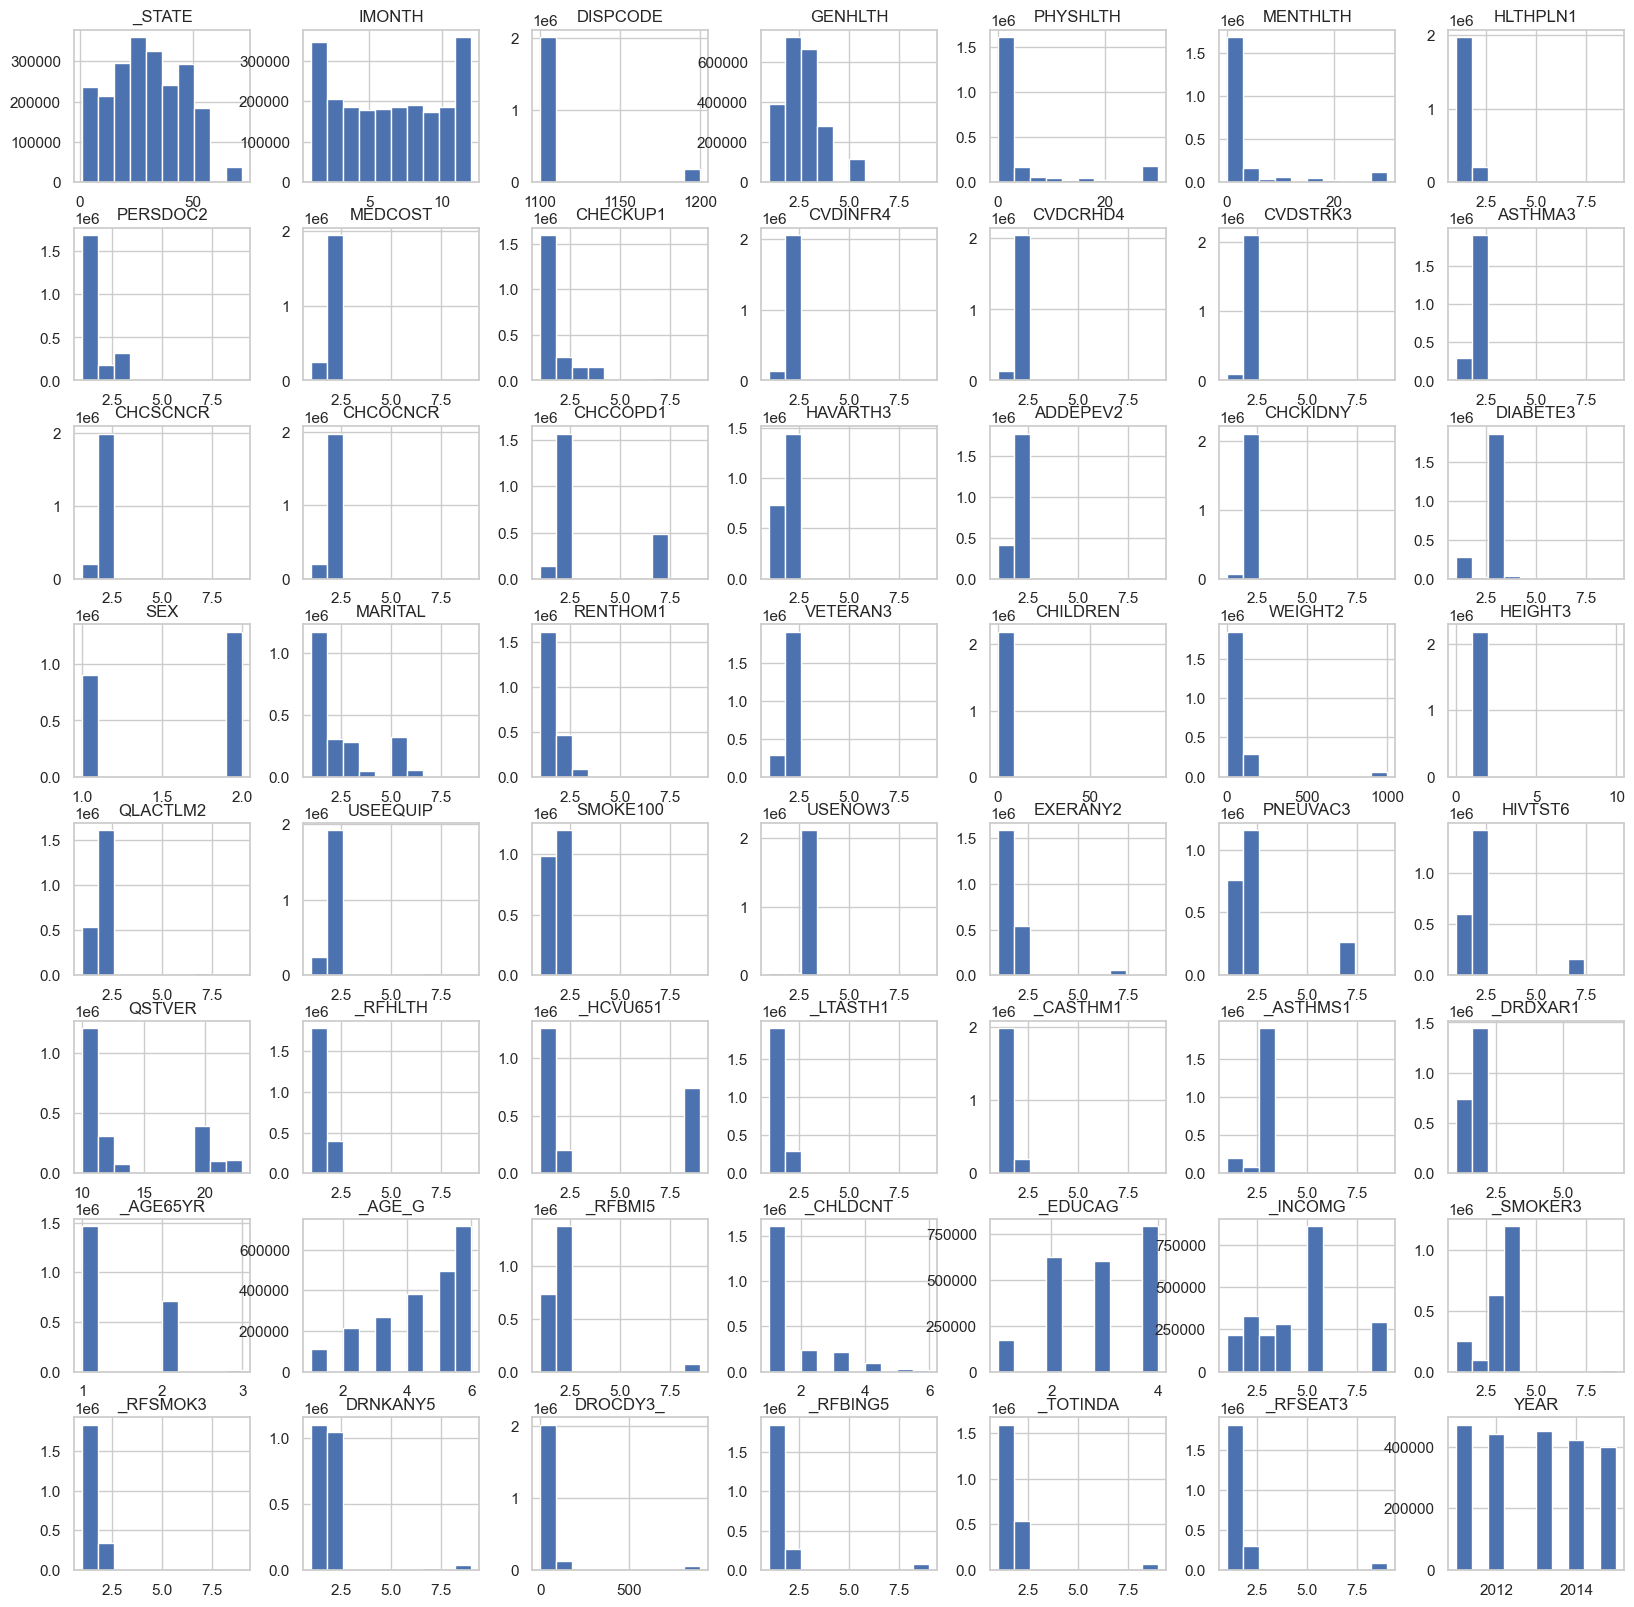

In [39]:
#Let's check the distribution of each variable in the dataframe
hist = df.hist(bins=10,figsize =(20, 20))

plt.show()

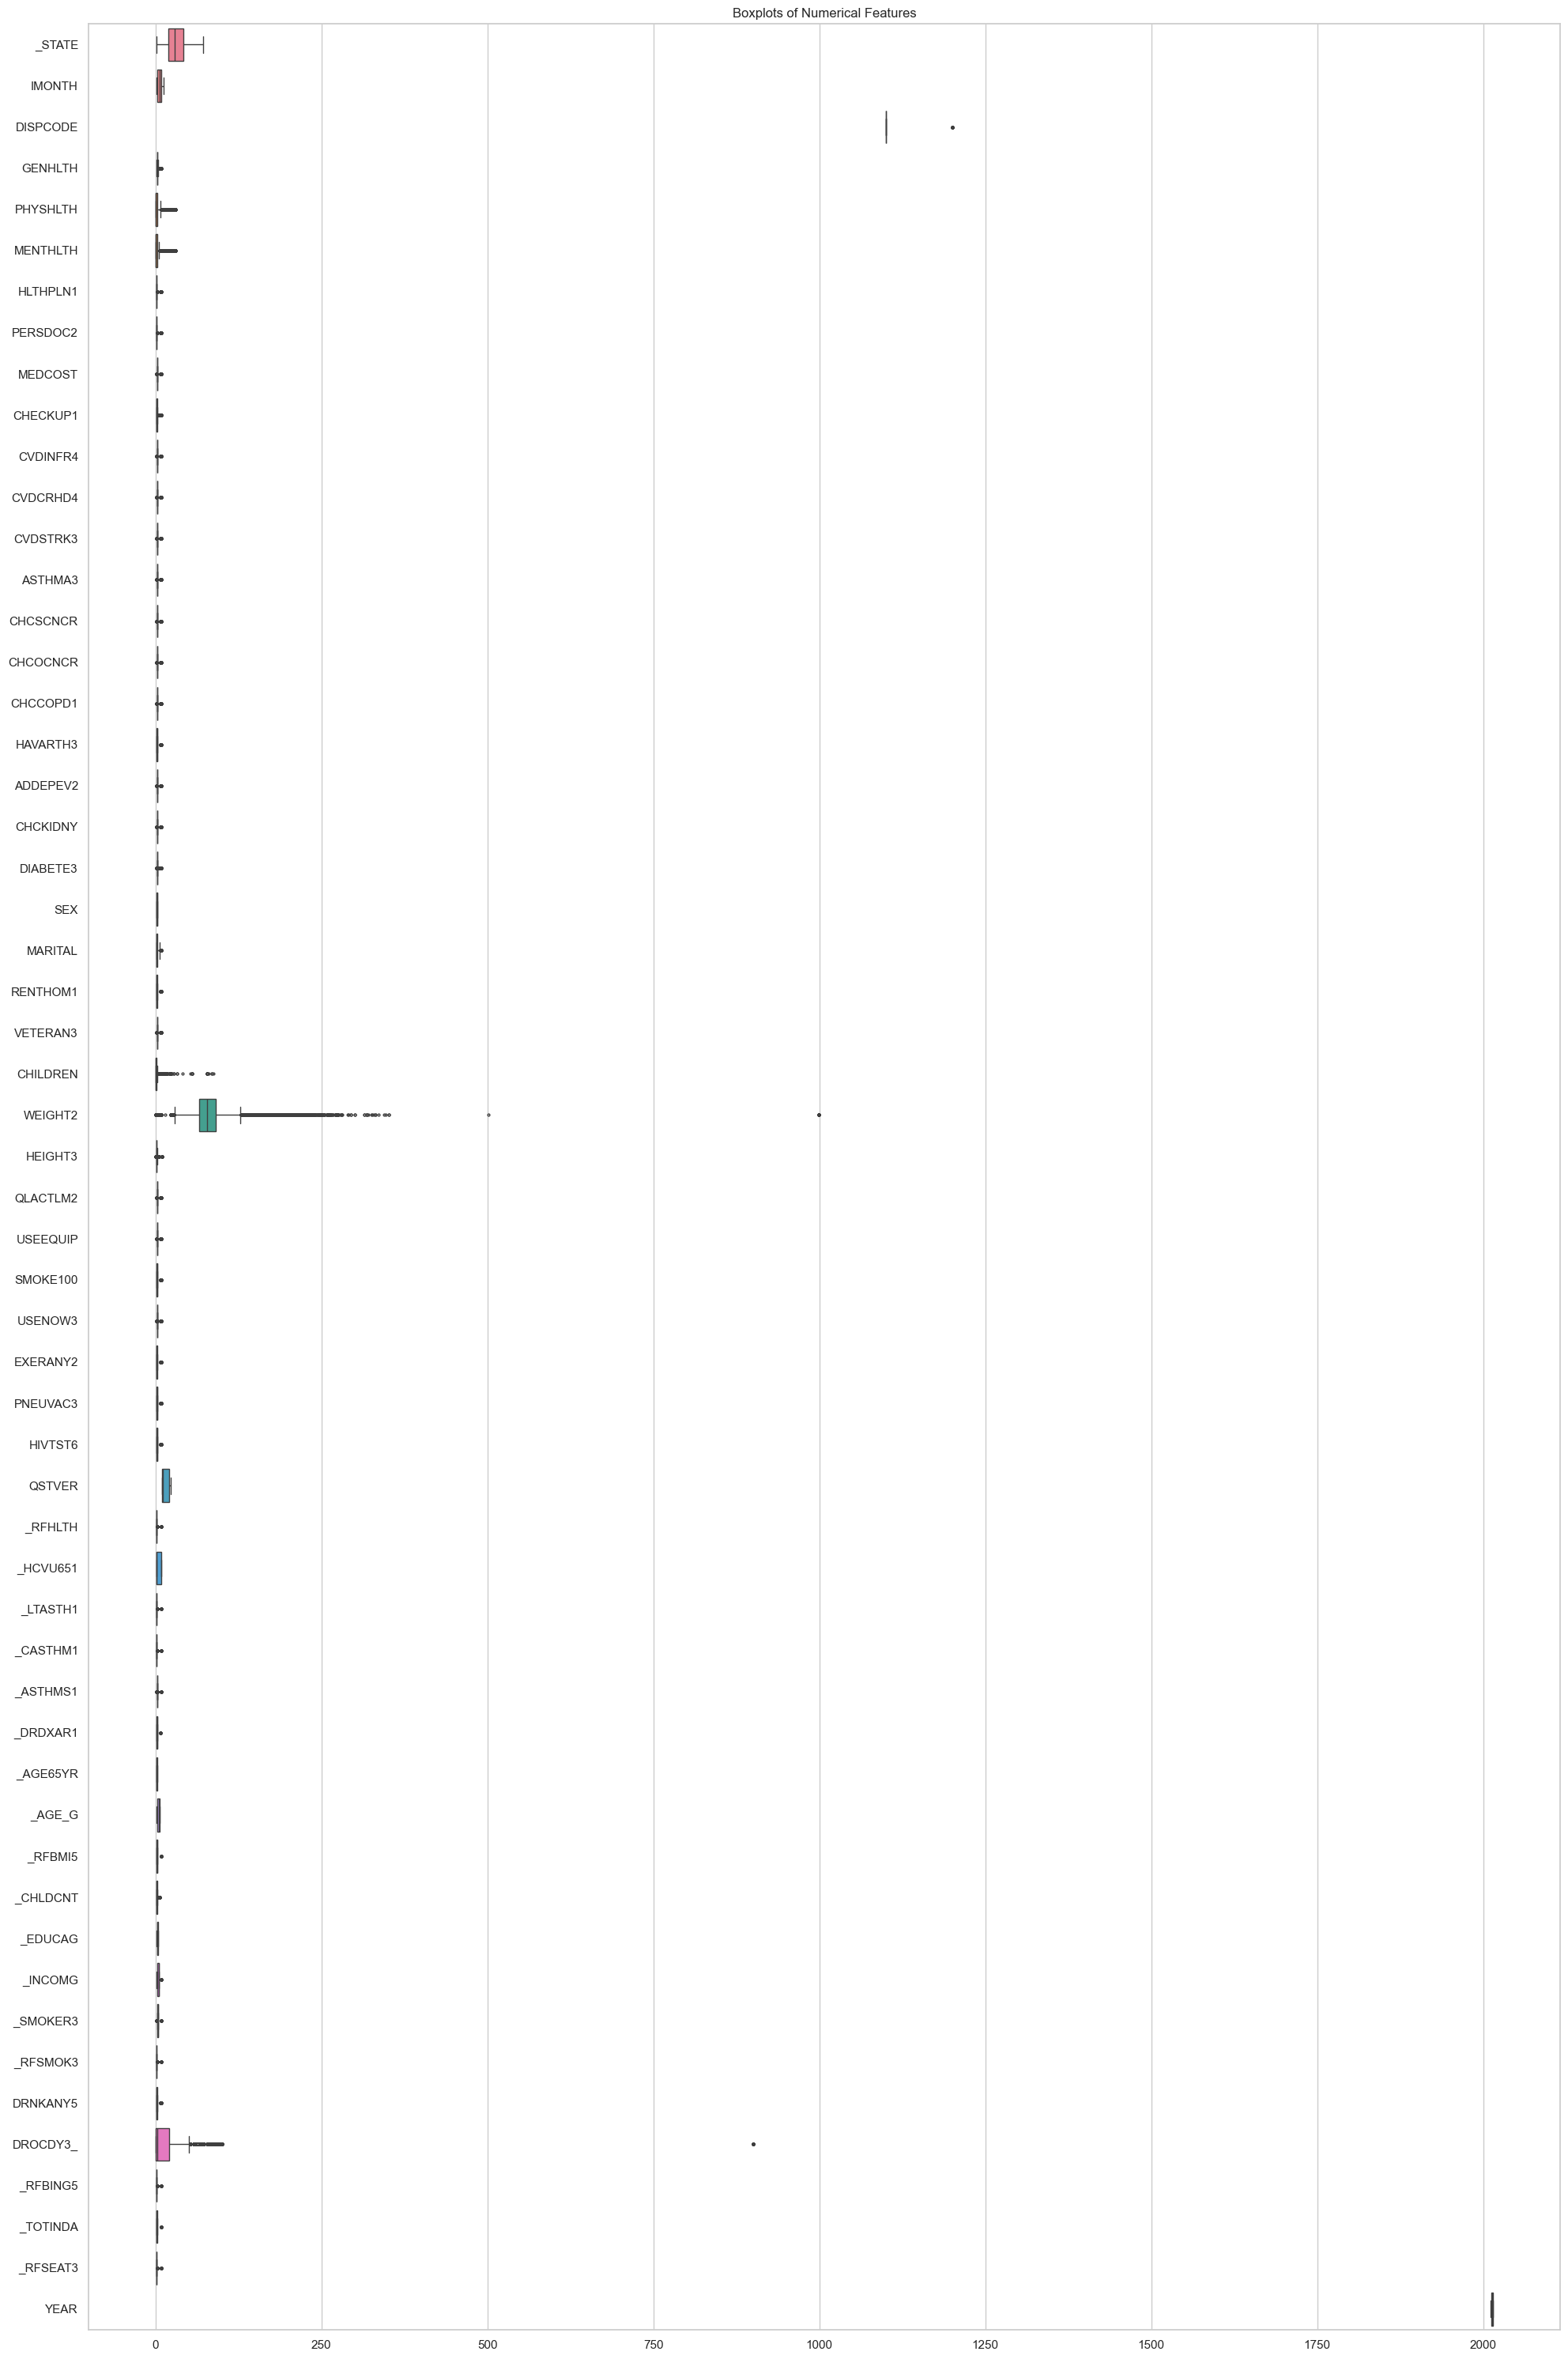

In [ ]:
# Check for outliers using boxplots
# Create a boxplot for every numerical column in df, with improved figure size for clarity
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, len(numeric_cols)*0.5 + 2))  # Dynamic height for clarity
sns.boxplot(data=df[numeric_cols], orient='h', fliersize=2, linewidth=1)
plt.title('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

We notice that `DISPCODE`, `CHILDREN`, `WEIGHT2`, `DROCDY3_` and `YEAR` have some outliers, let's investigate if they are problematic in our analysis

## 2. Visualizing Relationships Between Variables
- Correlation heatmap for numerical variables
- Pairplot for selected features
- Categorical variable relationships (bar plots, box plots)

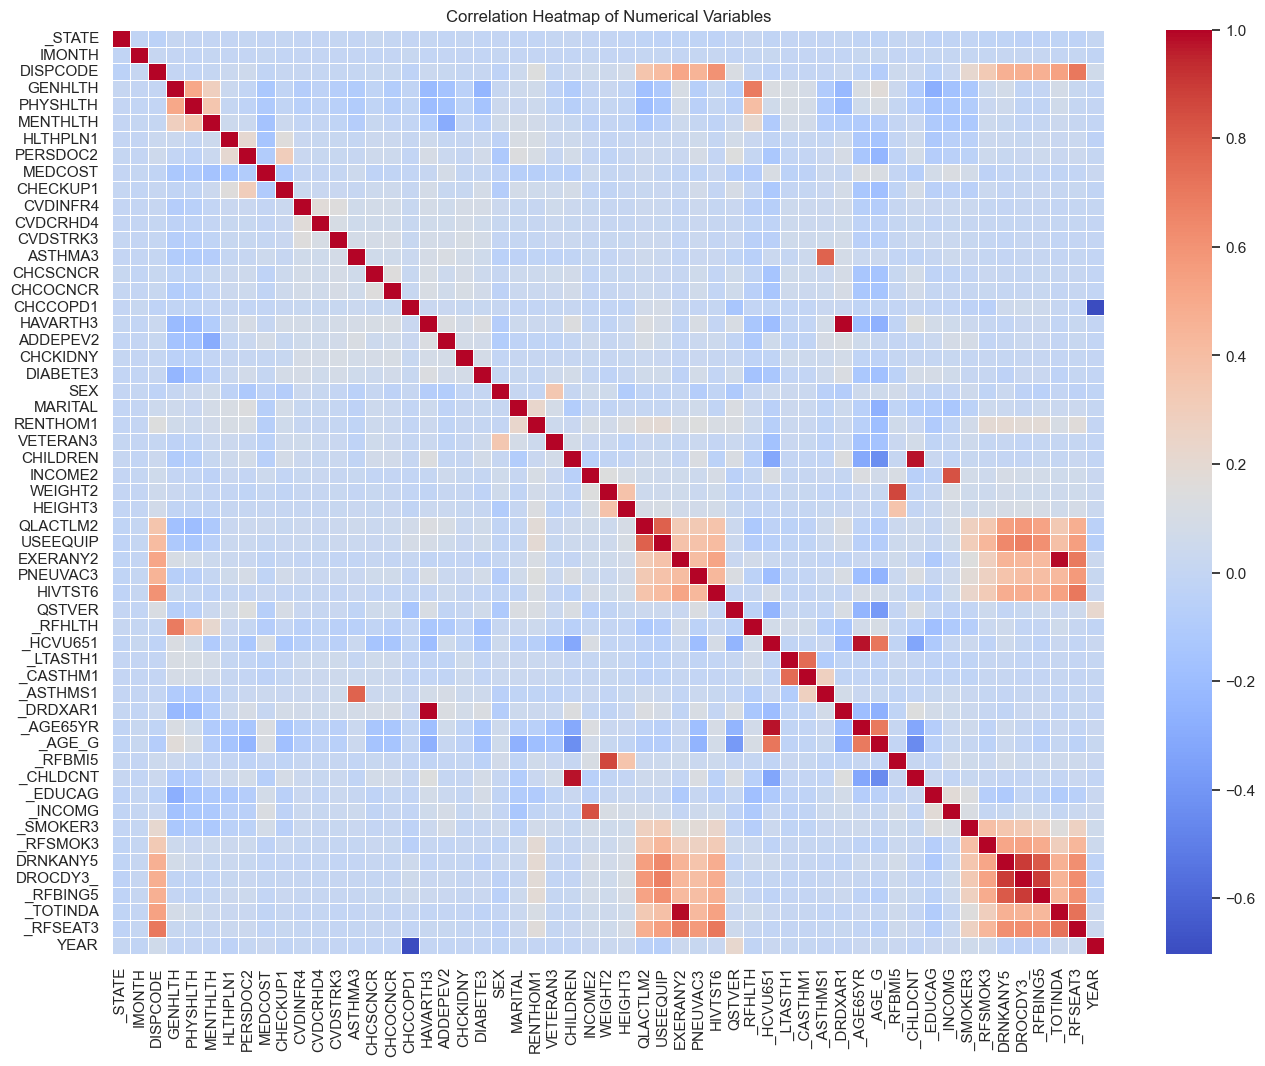

In [6]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

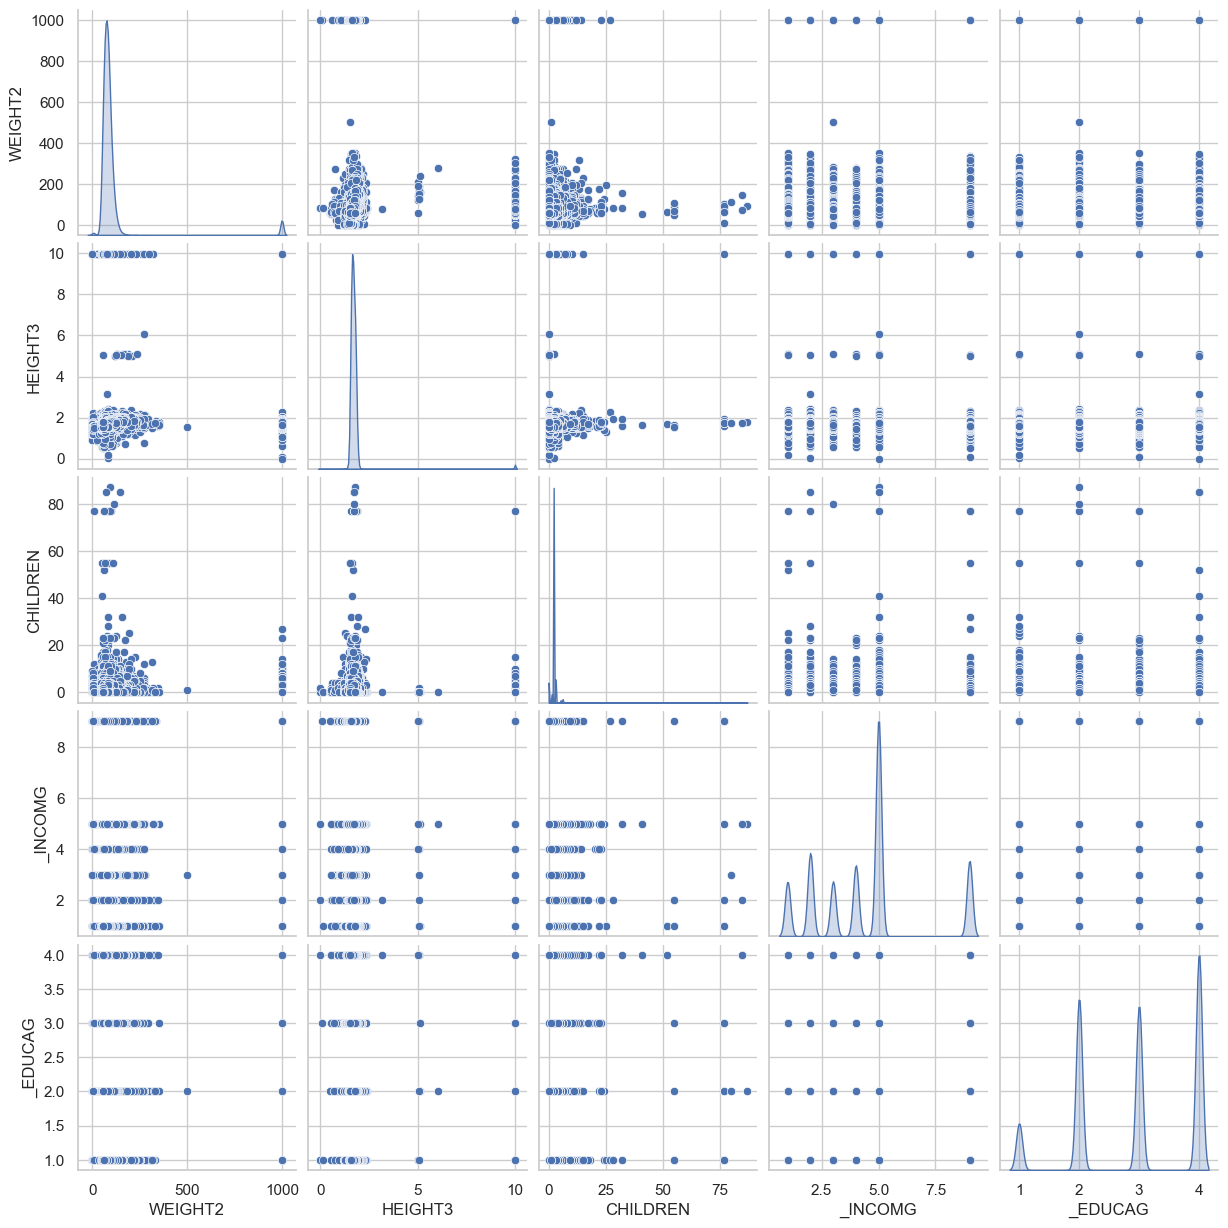

In [7]:
# # Pairplot for a subset of important variables (edit as needed)
# selected = [col for col in ['AGE', 'WEIGHT2', 'HEIGHT3', 'CHILDREN', '_INCOMG', '_EDUCAG'] if col in df.columns]
# if len(selected) > 1:
#     sns.pairplot(df[selected].dropna(), diag_kind='kde')
#     plt.show()

In [ ]:
# Example: Bar plot for a categorical variable vs. target (edit target as needed)
target = '_RFHLTH' if '_RFHLTH' in df.columns else df.columns[-1]
if 'SEX' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='SEX', hue=target, data=df)
    plt.title('Distribution of Target by Sex')
    plt.show()

In [ ]:
# Boxplot: Numerical variable by categorical variable (e.g., WEIGHT2 by SEX)
if 'WEIGHT2' in df.columns and 'SEX' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='SEX', y='WEIGHT2', data=df)
    plt.title('Weight Distribution by Sex')
    plt.show()

## 3. Feature Selection for Modeling
- Use correlation, mutual information, and domain knowledge to select features
- Display top features most related to the target variable

In [ ]:
# Encode categorical variables for feature selection
X = df.drop(columns=[target])
y = df[target]
X_enc = X.copy()
for col in X_enc.select_dtypes(include=['object', 'category']).columns:
    X_enc[col] = LabelEncoder().fit_transform(X_enc[col].astype(str))

# Mutual information for classification
mi = mutual_info_classif(X_enc, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
print("Top 10 features by mutual information with target:")
print(mi_series.head(10))

### Recommended Subset of Variables for Modeling
Select variables with high mutual information, low missingness, and relevance to the problem statement (e.g., health status, demographics, lifestyle factors). Adjust the list below as needed for your modeling goals.

In [ ]:
# Example: Select top N features for modeling
N = 15
selected_features = mi_series.head(N).index.tolist()
print("Selected features for modeling:", selected_features)

---
**Next Steps:**
- Refine feature selection based on domain knowledge and modeling results
- Proceed to model building and evaluation

## Evaluate and Select Target Variable for Smoking-Related Variables
Variables considered: SMOKE100, USENOW3, _SMOKER3, _RFSMOK3


SMOKE100 value counts:
SMOKE100
2.0    1198429
1.0     981986
7.0       7920
9.0       3637
Name: count, dtype: int64
Missing values: 0

USENOW3 value counts:
USENOW3
3.0    2118163
1.0      38672
2.0      30020
9.0       4538
7.0        579
Name: count, dtype: int64
Missing values: 0

_SMOKER3 value counts:
_SMOKER3
4    1198429
3     635955
1     248334
2      96456
9      12798
Name: count, dtype: int64
Missing values: 0

_RFSMOK3 value counts:
_RFSMOK3
1.0    1834384
2.0     344790
9.0      12798
Name: count, dtype: int64
Missing values: 0

Pairwise correlation between numeric smoking variables:
          SMOKE100   USENOW3  _SMOKER3  _RFSMOK3
SMOKE100  1.000000  0.246559  0.802200  0.345061
USENOW3   0.246559  1.000000  0.146272  0.221513
_SMOKER3  0.802200  0.146272  1.000000 -0.071518
_RFSMOK3  0.345061  0.221513 -0.071518  1.000000


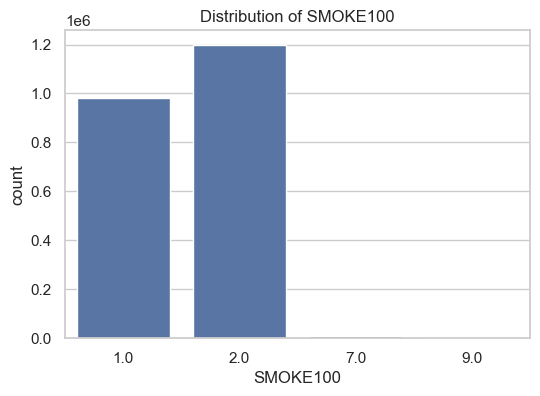

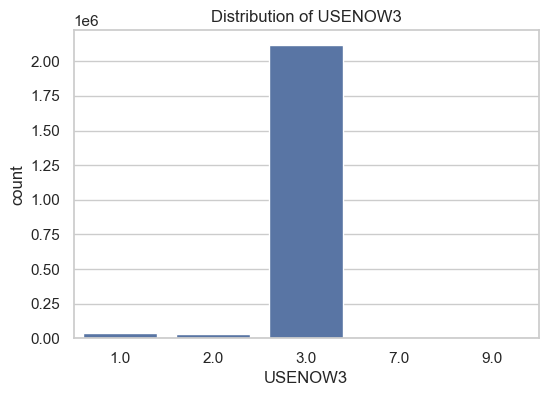

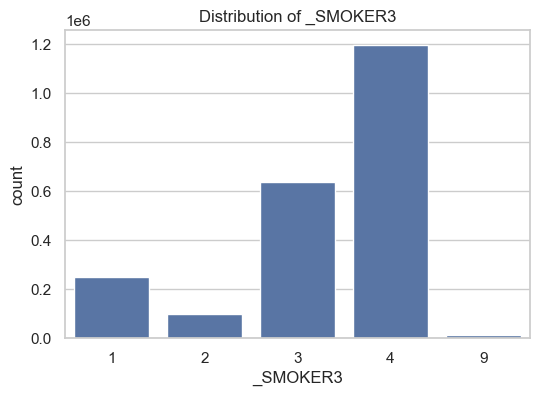

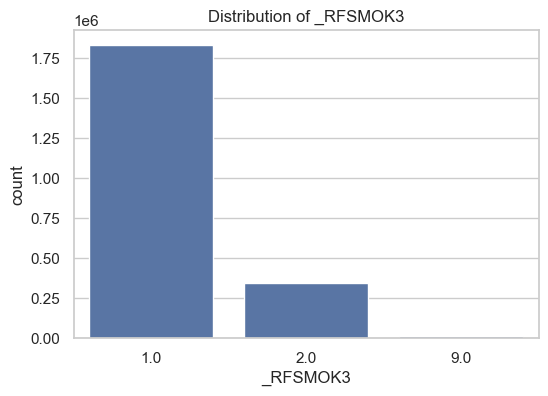


Summary of candidate smoking target variables:
         SMOKE100  USENOW3  _SMOKER3  _RFSMOK3
missing         0        0         0         0
nunique         4        5         5         3


In [35]:
# Evaluate smoking-related variables: SMOKE100, USENOW3, _SMOKER3, _RFSMOK3
smoking_vars = [col for col in ['SMOKE100', 'USENOW3', '_SMOKER3', '_RFSMOK3'] if col in df.columns]

# Show value counts and missingness for each smoking variable
target_candidates = {}
for col in smoking_vars:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(dropna=False))
    print(f"Missing values: {df[col].isnull().sum()}")
    # Store missing count and unique values for decision
    target_candidates[col] = {
        'missing': df[col].isnull().sum(),
        'nunique': df[col].nunique(),
        'value_counts': df[col].value_counts(dropna=False)
    }

# Compare overlap and correlation between smoking variables (only for numeric columns)
import numpy as np
numeric_smoking_vars = [col for col in smoking_vars if np.issubdtype(df[col].dropna().dtype, np.number)]
if len(numeric_smoking_vars) > 1:
    print("\nPairwise correlation between numeric smoking variables:")
    print(df[numeric_smoking_vars].corr())
else:
    print("\nNot enough numeric smoking variables for correlation matrix.")

# Visualize distributions
for col in smoking_vars:
    plt.figure(figsize=(6,4))
    try:
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()
    except Exception as e:
        print(f"Could not plot {col}: {e}")

# Recommendation logic: Prefer variable with lowest missingness, clear class separation, and most interpretable categories
# Print summary for decision
target_summary = pd.DataFrame({k: {'missing': v['missing'], 'nunique': v['nunique']} for k,v in target_candidates.items()})
print("\nSummary of candidate smoking target variables:")
print(target_summary)



We observe that _RFSMOKE3 has the least number of missing values and simplest form (with 3 unique categories). Let's go ahead with choosing it as our target variable.